#### Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Understanding

Passenger ID is a unique Key for each passenger<br>
Survived is a categorical variable with only 0 or 1<br>
Pclass is a categorical variable with only 1, 2 or 3<br>
Sibsp is the number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### Import Dataset

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# DataFrame Exploration

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()                       

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train["PassengerId"].value_counts(sort = True)           #Each passenger ID is unique

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [9]:
train["Survived"].value_counts()                          #Survived is a categorical variable with only 0 or 1

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train["Pclass"].value_counts()                             #Pclass is a categorical variable with only 1, 2 or 3

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train.duplicated(subset = 'Name', keep = False).sum()       # There is no duplicated Passengers' name

0

In [12]:
train["Sex"].value_counts()                                # There is only male and female

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Age'>

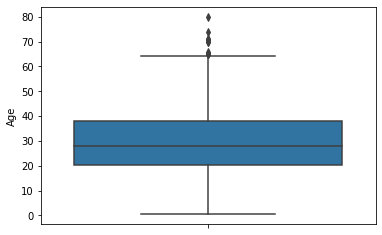

In [13]:
sns.boxplot(data=train, y='Age')

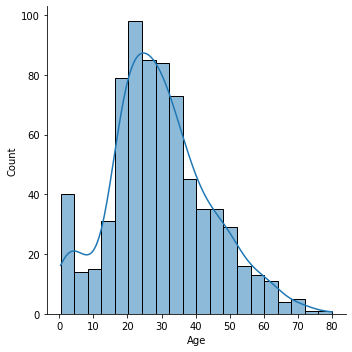

In [14]:
sns.displot(train['Age'], kde=True, bins=20)

In [15]:
train["SibSp"].value_counts()        

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
#check for null values, If NULL --> 0
train["SibSp"].isnull().sum() 

0

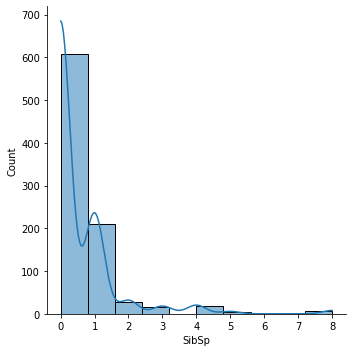

In [17]:
sns.displot(train['SibSp'], kde=True, bins=10)

In [18]:
train["Parch"].value_counts()    

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
#check for null values, If NULL --> 0
train["Parch"].isnull().sum() 

0

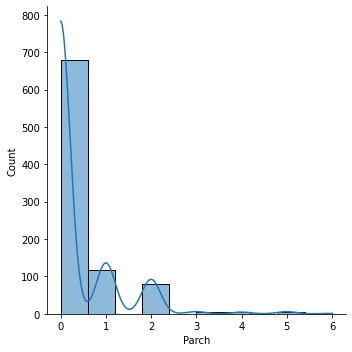

In [20]:
sns.displot(train['Parch'], kde=True, bins=10)

In [21]:
#check for duplicated ticket
train.duplicated(subset = 'Ticket', keep = False).sum()   

344

In [22]:
# Find duplicates
duplicated_ticket = train.duplicated(subset = 'Ticket', keep = False)

# Sort your duplicated rides
train[duplicated_ticket].sort_values(by = 'Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


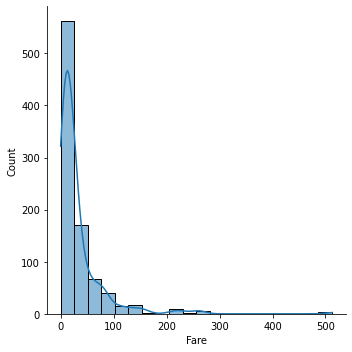

In [23]:
sns.displot(train['Fare'], kde=True, bins=20)

In [24]:
train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [25]:
#Categorise cabin into cabin types

train['Cabin_types'] = train['Cabin'].str.replace('\d+', '')
train['Cabin_types'] = train['Cabin_types'].str.strip()
train['Cabin_types'] = train['Cabin_types'].str[0]

<ipython-input-25-df5e748726d2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Cabin_types'] = train['Cabin'].str.replace('\d+', '')


In [26]:
train["Cabin_types"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_types, dtype: int64

In [27]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_types
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


# Model training - Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
y= train['Survived']

In [31]:
#logreg_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_types']

In [32]:
logreg_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_types']
X = train[logreg_features]
print(X.head())

   Pclass     Sex  SibSp  Parch     Fare Embarked Cabin_types
0       3    male      1      0   7.2500        S         NaN
1       1  female      1      0  71.2833        C           C
2       3  female      0      0   7.9250        S         NaN
3       1  female      1      0  53.1000        S           C
4       3    male      0      0   8.0500        S         NaN


In [33]:
#Replace Pclass with dummy variables

df_dummy = pd.get_dummies(train['Pclass'])
df_dummy = df_dummy.rename(columns ={1:"Pclass1", 2:"Pclass2", 3:"Pclass3"})

#Concatenate to training set

X = pd.concat([X, df_dummy], axis=1)

#Let the default Pclass be 3 **(drop Pclass, Pclass3)

X.drop(['Pclass', 'Pclass3'], axis=1, inplace = True)

In [34]:
#Replace Sex with dummy variables

df_dummy = pd.get_dummies(train['Sex'])

#Concatenate to training set

X = pd.concat([X, df_dummy], axis=1)

#Let the default Male be 3 **(drop Sex, female)

X.drop(['Sex', 'female'], axis=1, inplace = True)

In [35]:
#Replace Embark with dummy variables

df_dummy = pd.get_dummies(train['Embarked'])

#Concatenate to training set and rename

X = pd.concat([X, df_dummy], axis=1)
X = X.rename(columns={"C":"Embarked_C", "Q":"Embarked_Q", "S":"Embarked_S"})

#Let the default be "Embarked_C" **(drop Embarked, Embarked_C)

X.drop(['Embarked', 'Embarked_C'], axis=1, inplace= True)

##### **note that model improvement with addition of embark is very little

In [36]:
#Replace Embark with dummy variables

df_dummy = pd.get_dummies(train['Cabin_types'])

#Concatenate to training set and rename

X = pd.concat([X, df_dummy], axis=1)

#Let the default be "C"

X.drop(['Cabin_types', 'C'], axis=1, inplace=True)

##### **note that model accuracy decreased with addition of cabin types

In [37]:
print(X)

     SibSp  Parch     Fare  Pclass1  Pclass2  male  Embarked_Q  Embarked_S  A  \
0        1      0   7.2500        0        0     1           0           1  0   
1        1      0  71.2833        1        0     0           0           0  0   
2        0      0   7.9250        0        0     0           0           1  0   
3        1      0  53.1000        1        0     0           0           1  0   
4        0      0   8.0500        0        0     1           0           1  0   
..     ...    ...      ...      ...      ...   ...         ...         ... ..   
886      0      0  13.0000        0        1     1           0           1  0   
887      0      0  30.0000        1        0     0           0           1  0   
888      1      2  23.4500        0        0     0           0           1  0   
889      0      0  30.0000        1        0     1           0           0  0   
890      0      0   7.7500        0        0     1           1           0  0   

     B  D  E  F  G  T  
0  

In [38]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=70)

In [39]:
#Model Fitting
logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [40]:
#Test Results

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187  25]
 [ 39 106]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       212
           1       0.81      0.73      0.77       145

    accuracy                           0.82       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.82      0.82      0.82       357



## Plotting ROC

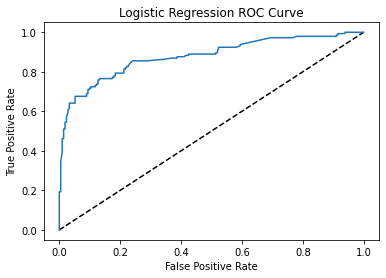

In [41]:
#plotting ROC curve

from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

## Area under ROC curve  (*want to improve this to 1)

In [42]:
from sklearn.metrics import roc_auc_score
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8781554977228367

In [43]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.83129117 0.81537433 0.85835561 0.84585561 0.84955458]


## Feature Elimination

In [44]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.452303
         Iterations: 35
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.321     
Dependent Variable:   Survived          AIC:               836.0040  
Date:                 2022-01-08 16:58  BIC:               907.8892  
No. Observations:     891               Log-Likelihood:    -403.00   
Df Model:             14                LL-Null:           -593.33   
Df Residuals:         876               LLR p-value:       1.5002e-72
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------
SibSp       -0.1753     0.0965  -1.8172 0.0692     -0.3644     0.0138
Parch       -0.0162     0.1117  -0.1446 0.8850     -

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
#Dropping insignificant variable
X.drop(['G', 'T', 'Parch', 'Embarked_S', 'A', 'B', 'D'], axis=1, inplace=True)

## Using GridSearch to tune hyperparameters

In [46]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression(max_iter=2000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.794977 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.794977 (0.040939) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.794977 (0.040939) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794977 (0.040939) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.794977 (0.040939) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.794977 (0.040939) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794977 (0.040939) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.794228 (0.042298) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.794598 (0.042685) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793858 (0.042001) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.791236 (0.042538) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.791236 (0.042538) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.790117 (0.042972) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.716825 (0.036495) wit

#### Hyperparamter tuning will not improve the model much

# Logistic Regression using Neural Networks

In [47]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

KeyboardInterrupt: 

In [ ]:
target = train['Survived'].astype("category")

In [ ]:
predictors = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_types']]

In [ ]:
predictors.fillna(value='unknown', inplace=True)

In [ ]:
#Transform categorical variables
def cat_vars_change(cat_vars_list, predictors):
    for vars in cat_vars_list:
        df_dummy = pd.get_dummies(predictors[vars], prefix=vars)
        predictors = pd.concat([predictors, df_dummy], axis=1)
        predictors.drop(vars, axis =1, inplace=True)     
    return predictors

In [ ]:
cat_vars_list = ['Pclass', 'Sex', 'Embarked', 'Cabin_types']

In [ ]:
predictors =cat_vars_change(cat_vars_list, predictors)

## Model Building

In [ ]:
early_stopping_monitor = EarlyStopping(patience=2)

In [ ]:
NNmodel =Sequential()

In [ ]:
NNmodel.add(Dense(250, activation='relu', input_shape=(predictors.shape[1],)))

In [ ]:
NNmodel.add(Dense(250, activation='relu'))

In [ ]:
NNmodel.add(Dense(100, activation='relu'))

In [ ]:
NNmodel.add(Dense(1, activation='sigmoid'))

In [ ]:
NNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
NNmodel.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])